## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline

## Load the dataset and Preprocessing

In [2]:
df = pd.read_csv("F:\\Datasets\\investments_VC.csv", encoding='iso-8859-1')
df.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

In [4]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') 
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce') 
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce')
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce')
df.market = df.market.str.strip() 

In [5]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [6]:
df['diff_funding_days'] = df["last_funding_at"] - df["first_funding_at"]

In [7]:
df['diff_funding_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days
df['diff_funding_months'] = df['diff_funding_days'] / 30
df['diff_funding_months'] = df['diff_funding_months'].round()

In [8]:
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']

In [9]:
df['total_investment'].sum()

650933703144.0

In [10]:
df['funding_total_usd'].sum()

650933703144.0

In [11]:
df['diff_first_funding_days'] = (df['first_funding_at'] - df['founded_at']).dt.days
df['diff_first_funding_months'] = df['diff_first_funding_days'] / 30
df['diff_first_funding_months'] = df['diff_first_funding_months'].round()

In [12]:
df_for_pred = df.copy()

In [13]:
df_for_pred = df_for_pred.drop(columns=['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding_days', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])

In [14]:
df_for_pred.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_first_funding_days'],
      dtype='object')

In [15]:
df_for_pred = df_for_pred.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months']) 

In [16]:
df_for_pred.isnull().sum()

permalink                     0
name                          0
market                        0
status                        0
country_code                  0
funding_rounds                0
seed                          0
venture                       0
equity_crowdfunding           0
undisclosed                   0
convertible_note              0
debt_financing                0
angel                         0
grant                         0
private_equity                0
post_ipo_equity               0
post_ipo_debt                 0
secondary_market              0
product_crowdfunding          0
round_A                       0
round_B                       0
round_C                       0
round_D                       0
round_E                       0
round_F                       0
round_G                       0
round_H                       0
diff_funding_months           0
total_investment              0
diff_first_funding_days    7268
dtype: int64

In [17]:
df_for_pred.loc[:, 'diff_funding_year'] = round(df_for_pred['diff_funding_months']/12)

In [18]:
df_for_pred

,permalink,name,market,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,round_C,round_D,round_E,round_F,round_G,round_H,diff_funding_months,total_investment,diff_first_funding_days,diff_funding_year
0,/organization/waywire,#waywire,News,acquired,USA,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,29.0,0.0
1,/organization/tv-communications,&TV Communications,Games,operating,USA,2.0,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4000000.0,NaN,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,Publishing,operating,EST,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,-78.0,0.0
3,/organization/in-touch-network,(In)Touch Network,Electronics,operating,GBR,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,Tourism,operating,USA,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60000.0,228.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,1.0,0.0,2686600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,2220.0,0.0
49433,/organization/zzish,Zzish,Education,operating,GBR,1.0,320000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000.0,420.0,0.0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,1.0,0.0,1587301.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,NaN,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Web Development,operating,HRV,5.0,71525.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,35.0,97398.0,-194.0,3.0


In [19]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [20]:
df_for_pred['Industry Group'] = np.where(df_for_pred['market'].str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                            np.where(df_for_pred['market'].str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                            np.where(df_for_pred['market'].str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                            np.where(df_for_pred['market'].str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                            np.where(df_for_pred['market'].str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                            np.where(df_for_pred['market'].str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                            np.where(df_for_pred['market'].str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                            np.where(df_for_pred['market'].str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                            np.where(df_for_pred['market'].str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                            np.where(df_for_pred['market'].str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                            np.where(df_for_pred['market'].str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                            np.where(df_for_pred['market'].str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                            np.where(df_for_pred['market'].str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                            np.where(df_for_pred['market'].str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                            np.where(df_for_pred['market'].str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                            np.where(df_for_pred['market'].str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                            np.where(df_for_pred['market'].str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                            np.where(df_for_pred['market'].str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                            np.where(df_for_pred['market'].str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                            np.where(df_for_pred['market'].str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                            np.where(df_for_pred['market'].str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                            np.where(df_for_pred['market'].str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                            np.where(df_for_pred['market'].str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                            np.where(df_for_pred['market'].str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                            np.where(df_for_pred['market'].str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                            np.where(df_for_pred['market'].str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                            np.where(df_for_pred['market'].str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                            np.where(df_for_pred['market'].str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                            np.where(df_for_pred['market'].str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                            np.where(df_for_pred['market'].str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                            np.where(df_for_pred['market'].str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                            np.where(df_for_pred['market'].str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                            np.where(df_for_pred['market'].str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                            np.where(df_for_pred['market'].str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                            np.where(df_for_pred['market'].str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                            np.where(df_for_pred['market'].str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                            np.where(df_for_pred['market'].str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                            np.where(df_for_pred['market'].str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                            np.where(df_for_pred['market'].str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                            np.where(df_for_pred['market'].str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                            np.where(df_for_pred['market'].str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                            np.where(df_for_pred['market'].str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                            np.where(df_for_pred['market'].str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                            np.where(df_for_pred['market'].str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                            np.where(df_for_pred['market'].str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")
                            ))))))))))))))))))))))))))))))))))))))))))))

C:\Users\HP\AppData\Local\Temp\ipykernel_14892\1070225266.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df_for_pred['market'].str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
C:\Users\HP\AppData\Local\Temp\ipykernel_14892\1070225266.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df_for_pred['market'].str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
C:\Users\HP\AppData\Local\Temp\ipykernel_14892\1070225266.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(df_for_pred['market'].str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
C:\Users\HP\AppData\Local\Temp\ipykernel_14892\1070225266.py:23: UserWarning: This pattern is interpr

In [21]:
df_for_pred['Industry Group']

0        Content and Publishing
1                        Gaming
2        Content and Publishing
3                      Hardware
4            Travel and Tourism
                  ...          
49432             Biotechnology
49433                 Education
49434                  Software
49435                  Software
49437                  Software
Name: Industry Group, Length: 40471, dtype: object

In [22]:
df_for_pred.groupby('Industry Group')['total_investment'].describe()

,count,mean,std,min,25%,50%,75%,max
Industry Group,,,,,,,,
Administrative Services,142.0,9.229906e+06,2.588099e+07,0.0,62000.00,635870.0,4748752.75,1.920000e+08
Advertising,1548.0,1.599660e+07,4.266310e+07,0.0,446030.75,3758200.0,15186946.25,1.137000e+09
Agriculture and Farming,31.0,1.369088e+07,2.693625e+07,0.0,132269.00,2250000.0,11400001.00,1.089000e+08
Apps,31.0,4.964695e+06,9.689567e+06,0.0,28539.50,850000.0,3836500.00,3.794500e+07
Artificial Intelligence,2.0,6.076100e+06,5.481632e+06,2200000.0,4138049.75,6076099.5,8014149.25,9.952199e+06
Biotechnology,3494.0,2.001558e+07,5.665787e+07,0.0,1060938.00,4955000.0,20195985.00,2.400000e+09
Clothing and Apparel,357.0,1.099989e+07,4.014313e+07,0.0,0.00,334171.0,4000000.00,4.026846e+08
Commerce and Shopping,2267.0,1.281046e+07,7.305075e+07,0.0,40000.00,700000.0,5000000.00,2.351140e+09
Consumer Goods,164.0,9.694839e+06,4.298114e+07,0.0,25000.00,800000.0,5675000.00,5.028600e+08


In [23]:
df_for_pred.groupby('Industry Group')['permalink'].count().sort_values(ascending = False)

Industry Group
Software                           8069
Internet Services                  3627
Biotechnology                      3494
Health Care                        3046
Commerce and Shopping              2267
Information Technology             1994
Mobile                             1812
Advertising                        1548
Other                              1411
Financial Services                 1265
Media and Entertainment            1238
Gaming                             1214
Professional Services               989
Education                           927
Data and Analytics                  911
Content and Publishing              826
Manufacturing                       690
Real Estate                         561
Privacy and Security                536
Sales and Marketing                 529
Hardware                            526
Transportation                      485
Travel and Tourism                  417
Clothing and Apparel                357
Sports                   

In [24]:
df_for_pred

,permalink,name,market,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,...,round_D,round_E,round_F,round_G,round_H,diff_funding_months,total_investment,diff_first_funding_days,diff_funding_year,Industry Group
0,/organization/waywire,#waywire,News,acquired,USA,1.0,1750000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,29.0,0.0,Content and Publishing
1,/organization/tv-communications,&TV Communications,Games,operating,USA,2.0,0.0,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4000000.0,NaN,0.0,Gaming
2,/organization/rock-your-paper,'Rock' Your Paper,Publishing,operating,EST,1.0,40000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,-78.0,0.0,Content and Publishing
3,/organization/in-touch-network,(In)Touch Network,Electronics,operating,GBR,1.0,1500000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,Hardware
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,Tourism,operating,USA,2.0,0.0,0.0,60000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,60000.0,228.0,0.0,Travel and Tourism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,1.0,0.0,2686600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,2220.0,0.0,Biotechnology
49433,/organization/zzish,Zzish,Education,operating,GBR,1.0,320000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,320000.0,420.0,0.0,Education
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,1.0,0.0,1587301.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,NaN,0.0,Software
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Web Development,operating,HRV,5.0,71525.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,97398.0,-194.0,3.0,Software


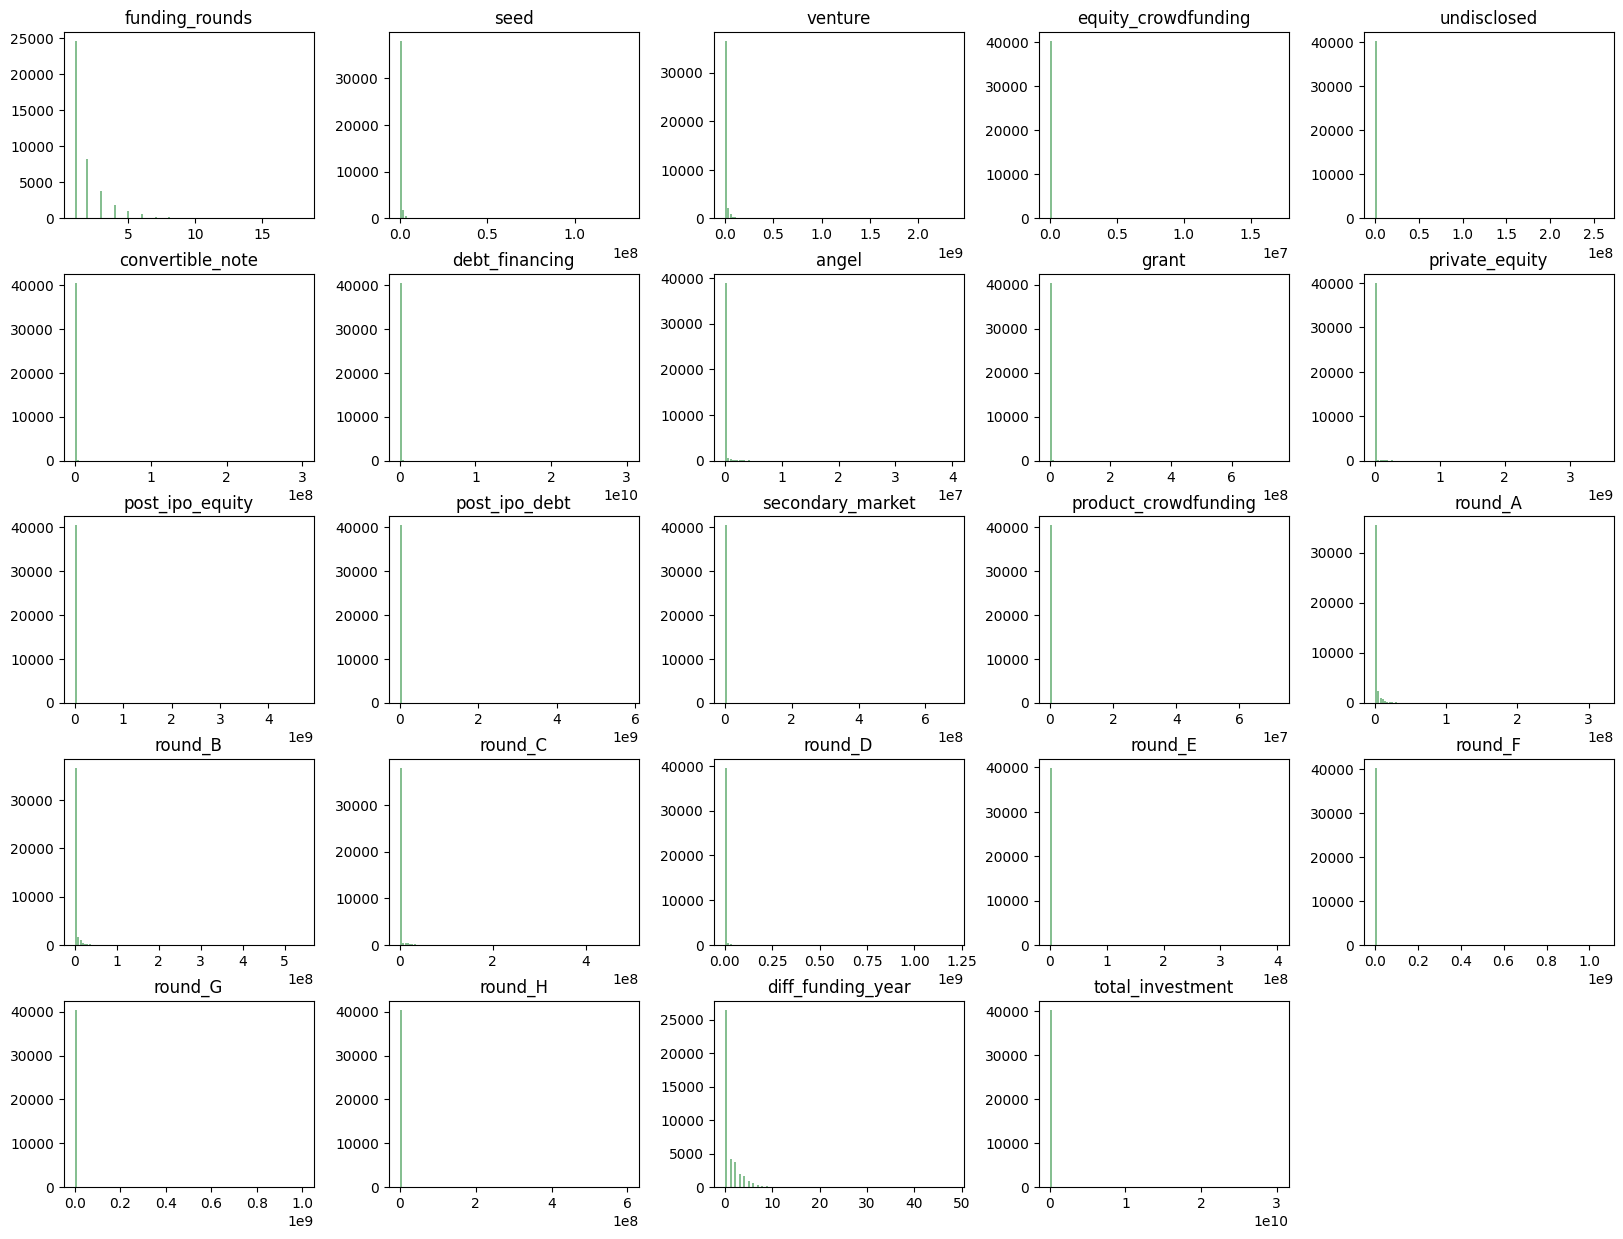

In [25]:
df_for_pred.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9) 
%matplotlib inline

In [26]:
df_for_pred.isin([0]).sum()

permalink                      0
name                           0
market                         0
status                         0
country_code                   0
funding_rounds                 0
seed                       29370
venture                    19761
equity_crowdfunding        40019
undisclosed                39752
convertible_note           39979
debt_financing             36655
angel                      37793
grant                      39555
private_equity             39258
post_ipo_equity            40236
post_ipo_debt              40412
secondary_market           40455
product_crowdfunding       40297
round_A                    32300
round_B                    35367
round_C                    37766
round_D                    39226
round_E                    39972
round_F                    40303
round_G                    40439
round_H                    40467
diff_funding_months        24867
total_investment            5981
diff_first_funding_days     1935
diff_fundi

In [27]:
df_for_pred_final = df_for_pred.copy()

In [28]:
df_for_pred_final = df_for_pred_final.drop(columns=['diff_funding_months', 'market'], axis=1)

In [29]:
df_for_pred_final

,permalink,name,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,round_C,round_D,round_E,round_F,round_G,round_H,total_investment,diff_first_funding_days,diff_funding_year,Industry Group
0,/organization/waywire,#waywire,acquired,USA,1.0,1750000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,29.0,0.0,Content and Publishing
1,/organization/tv-communications,&TV Communications,operating,USA,2.0,0.0,4000000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,NaN,0.0,Gaming
2,/organization/rock-your-paper,'Rock' Your Paper,operating,EST,1.0,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,-78.0,0.0,Content and Publishing
3,/organization/in-touch-network,(In)Touch Network,operating,GBR,1.0,1500000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,Hardware
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,operating,USA,2.0,0.0,0.0,60000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,228.0,0.0,Travel and Tourism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,/organization/zytoprotec,Zytoprotec,operating,AUT,1.0,0.0,2686600.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,2220.0,0.0,Biotechnology
49433,/organization/zzish,Zzish,operating,GBR,1.0,320000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,320000.0,420.0,0.0,Education
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,operating,CHN,1.0,0.0,1587301.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,NaN,0.0,Software
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,operating,HRV,5.0,71525.0,0.0,0.0,0.0,25873.0,...,0.0,0.0,0.0,0.0,0.0,0.0,97398.0,-194.0,3.0,Software


In [30]:
df_for_pred_final[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,40471.0,1.792419e+00,1.369612e+00,1.0,1.0,1.0,2.0,1.800000e+01
seed,40471.0,2.355957e+05,1.138923e+06,0.0,0.0,0.0,25998.0,1.300000e+08
venture,40471.0,8.566142e+06,3.082979e+07,0.0,0.0,100000.0,6000000.0,2.351000e+09
equity_crowdfunding,40471.0,5.909321e+03,1.706082e+05,0.0,0.0,0.0,0.0,1.700000e+07
undisclosed,40471.0,1.134331e+05,2.587693e+06,0.0,0.0,0.0,0.0,2.594178e+08
convertible_note,40471.0,2.721611e+04,1.581565e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,40471.0,2.096385e+06,1.518468e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,40471.0,6.831120e+04,5.767907e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,40471.0,1.781120e+05,6.102226e+06,0.0,0.0,0.0,0.0,7.505000e+08
private_equity,40471.0,2.283772e+06,3.400667e+07,0.0,0.0,0.0,0.0,3.500000e+09


In [31]:
cat_invest = pd.cut(df_for_pred_final.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
df_for_pred_final.insert(0,'cat_total_investment',cat_invest)

In [32]:
cat_diff_funding_year = pd.cut(df_for_pred_final.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])
df_for_pred_final.insert(0,'cat_diff_funding_year',cat_diff_funding_year)

In [33]:
cat_funding_rounds = pd.cut(df_for_pred_final.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
df_for_pred_final.insert(0,'cat_funding_rounds',cat_funding_rounds)

In [34]:
cat_seed = pd.cut(df_for_pred_final.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
df_for_pred_final.insert(0,'cat_seed',cat_seed)

In [35]:
cat_venture = pd.cut(df_for_pred_final.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
df_for_pred_final.insert(0,'cat_venture',cat_venture)

In [36]:
df_for_pred_final['cat_status'] = df_for_pred_final['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df_for_pred_final['cat_total_investment'] = df_for_pred_final['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df_for_pred_final['cat_diff_funding_year'] = df_for_pred_final['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df_for_pred_final['cat_funding_rounds'] = df_for_pred_final['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df_for_pred_final['cat_seed'] = df_for_pred_final['cat_seed'].replace(['low', 'high'], [0, 1])
df_for_pred_final['cat_venture'] = df_for_pred_final['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

In [37]:
df_for_pred_final.columns

Index(['cat_venture', 'cat_seed', 'cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment', 'permalink', 'name',
       'status', 'country_code', 'funding_rounds', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'total_investment', 'diff_first_funding_days',
       'diff_funding_year', 'Industry Group', 'cat_status'],
      dtype='object')

In [38]:
df_for_pred_final.loc[df_for_pred_final['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df_for_pred_final.loc[df_for_pred_final['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df_for_pred_final.loc[df_for_pred_final['undisclosed'] < 1, 'cat_undisclosed'] = 0
df_for_pred_final.loc[df_for_pred_final['undisclosed'] > 1, 'cat_undisclosed'] = 1


df_for_pred_final.loc[df_for_pred_final['convertible_note'] < 1, 'cat_convertible_note'] = 0
df_for_pred_final.loc[df_for_pred_final['convertible_note'] > 1, 'cat_convertible_note'] = 1

df_for_pred_final.loc[df_for_pred_final['debt_financing'] < 1, 'cat_debt_financing'] = 0
df_for_pred_final.loc[df_for_pred_final['debt_financing'] > 1, 'cat_debt_financing'] = 1

df_for_pred_final.loc[df_for_pred_final['angel'] < 1, 'cat_angel'] = 0
df_for_pred_final.loc[df_for_pred_final['angel'] > 1, 'cat_angel'] = 1

df_for_pred_final.loc[df_for_pred_final['grant'] < 1, 'cat_grant'] = 0
df_for_pred_final.loc[df_for_pred_final['grant'] > 1, 'cat_grant'] = 1


df_for_pred_final.loc[df_for_pred_final['private_equity'] < 1, 'cat_private_equity'] = 0
df_for_pred_final.loc[df_for_pred_final['private_equity'] > 1, 'cat_private_equity'] = 1

df_for_pred_final.loc[df_for_pred_final['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df_for_pred_final.loc[df_for_pred_final['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df_for_pred_final.loc[df_for_pred_final['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df_for_pred_final.loc[df_for_pred_final['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df_for_pred_final.loc[df_for_pred_final['secondary_market'] < 1, 'cat_secondary_market'] = 0
df_for_pred_final.loc[df_for_pred_final['secondary_market'] > 1, 'cat_secondary_market'] = 1

df_for_pred_final.loc[df_for_pred_final['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df_for_pred_final.loc[df_for_pred_final['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df_for_pred_final.loc[df_for_pred_final['round_A'] < 1, 'cat_round_A'] = 0
df_for_pred_final.loc[df_for_pred_final['round_A'] > 1, 'cat_round_A'] = 1

df_for_pred_final.loc[df_for_pred_final['round_B'] < 1, 'cat_round_B'] = 0
df_for_pred_final.loc[df_for_pred_final['round_B'] > 1, 'cat_round_B'] = 1

df_for_pred_final.loc[df_for_pred_final['round_C'] < 1, 'cat_round_C'] = 0
df_for_pred_final.loc[df_for_pred_final['round_C'] > 1, 'cat_round_C'] = 1

df_for_pred_final.loc[df_for_pred_final['round_D'] < 1, 'cat_round_D'] = 0
df_for_pred_final.loc[df_for_pred_final['round_D'] > 1, 'cat_round_D'] = 1

df_for_pred_final.loc[df_for_pred_final['round_E'] < 1, 'cat_round_E'] = 0
df_for_pred_final.loc[df_for_pred_final['round_E'] > 1, 'cat_round_E'] = 1

df_for_pred_final.loc[df_for_pred_final['round_F'] < 1, 'cat_round_F'] = 0
df_for_pred_final.loc[df_for_pred_final['round_F'] > 1, 'cat_round_F'] = 1

df_for_pred_final.loc[df_for_pred_final['round_G'] < 1, 'cat_round_G'] = 0
df_for_pred_final.loc[df_for_pred_final['round_G'] > 1, 'cat_round_G'] = 1

df_for_pred_final.loc[df_for_pred_final['round_H'] < 1, 'cat_round_H'] = 0
df_for_pred_final.loc[df_for_pred_final['round_H'] > 1, 'cat_round_H'] = 1

In [39]:
df_for_pred_final['Industry Group']

0        Content and Publishing
1                        Gaming
2        Content and Publishing
3                      Hardware
4            Travel and Tourism
                  ...          
49432             Biotechnology
49433                 Education
49434                  Software
49435                  Software
49437                  Software
Name: Industry Group, Length: 40471, dtype: object

In [40]:
labelencoder = LabelEncoder()
df_for_pred_final['cat_country_code'] = labelencoder.fit_transform(df_for_pred_final['country_code'])
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
print(mapping)

{'ALB': 0, 'ARE': 1, 'ARG': 2, 'ARM': 3, 'AUS': 4, 'AUT': 5, 'AZE': 6, 'BEL': 7, 'BGD': 8, 'BGR': 9, 'BHR': 10, 'BHS': 11, 'BLR': 12, 'BMU': 13, 'BRA': 14, 'BRN': 15, 'BWA': 16, 'CAN': 17, 'CHE': 18, 'CHL': 19, 'CHN': 20, 'CIV': 21, 'CMR': 22, 'COL': 23, 'CRI': 24, 'CYM': 25, 'CYP': 26, 'CZE': 27, 'DEU': 28, 'DNK': 29, 'DOM': 30, 'DZA': 31, 'ECU': 32, 'EGY': 33, 'ESP': 34, 'EST': 35, 'FIN': 36, 'FRA': 37, 'GBR': 38, 'GHA': 39, 'GIB': 40, 'GRC': 41, 'GTM': 42, 'HKG': 43, 'HRV': 44, 'HUN': 45, 'IDN': 46, 'IND': 47, 'IRL': 48, 'ISL': 49, 'ISR': 50, 'ITA': 51, 'JAM': 52, 'JOR': 53, 'JPN': 54, 'KEN': 55, 'KHM': 56, 'KOR': 57, 'KWT': 58, 'LAO': 59, 'LBN': 60, 'LIE': 61, 'LTU': 62, 'LUX': 63, 'LVA': 64, 'MAF': 65, 'MAR': 66, 'MCO': 67, 'MDA': 68, 'MEX': 69, 'MKD': 70, 'MLT': 71, 'MMR': 72, 'MUS': 73, 'MYS': 74, 'NGA': 75, 'NIC': 76, 'NLD': 77, 'NOR': 78, 'NPL': 79, 'NZL': 80, 'OMN': 81, 'PAK': 82, 'PAN': 83, 'PER': 84, 'PHL': 85, 'POL': 86, 'PRT': 87, 'ROM': 88, 'RUS': 89, 'SAU': 90, 'SGP': 9

In [41]:
df_for_pred_final['cat_industry_group'] = labelencoder.fit_transform(df_for_pred_final['Industry Group'])
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
print(mapping)

{'Administrative Services': 0, 'Advertising': 1, 'Agriculture and Farming': 2, 'Apps': 3, 'Artificial Intelligence': 4, 'Biotechnology': 5, 'Clothing and Apparel': 6, 'Commerce and Shopping': 7, 'Consumer Goods': 8, 'Content and Publishing': 9, 'Data and Analytics': 10, 'Design': 11, 'Education': 12, 'Energy': 13, 'Events': 14, 'Financial Services': 15, 'Food and Beverage': 16, 'Gaming': 17, 'Government and Military': 18, 'Hardware': 19, 'Health Care': 20, 'Information Technology': 21, 'Internet Services': 22, 'Manufacturing': 23, 'Media and Entertainment': 24, 'Messaging and Telecommunication': 25, 'Mobile': 26, 'Natural Resources': 27, 'Navigation and Mapping': 28, 'Other': 29, 'Platforms': 30, 'Privacy and Security': 31, 'Professional Services': 32, 'Real Estate': 33, 'Sales and Marketing': 34, 'Science and Engineering': 35, 'Software': 36, 'Sports': 37, 'Sustainability': 38, 'Transportation': 39, 'Travel and Tourism': 40}


In [42]:
df_final = df_for_pred_final[['cat_status', 'cat_industry_group',
       'cat_country_code','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']]

In [43]:
df_final.head(10)

,cat_status,cat_industry_group,cat_country_code,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,2,9,108,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,17,108,0,0,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9,35,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,19,38,0,0,2,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,40,108,0,0,0,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1,2,0,0,2,0.0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,36,108,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,17,43,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,7,19,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,36,108,0,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_final.isna().sum()

cat_status                  0
cat_industry_group          0
cat_country_code            0
cat_funding_rounds          0
cat_diff_funding_year       0
cat_total_investment        0
cat_equity_crowdfunding     0
cat_venture                 0
cat_seed                    0
cat_undisclosed             0
cat_convertible_note        0
cat_debt_financing          0
cat_angel                   0
cat_grant                   0
cat_private_equity          0
cat_post_ipo_equity         0
cat_post_ipo_debt           0
cat_secondary_market        0
cat_product_crowdfunding    0
cat_round_A                 0
cat_round_B                 0
cat_round_C                 0
cat_round_D                 0
cat_round_E                 0
cat_round_F                 0
cat_round_G                 0
cat_round_H                 0
dtype: int64

In [45]:
#others are removed which have low values using correlation matrix
df_final_model_1= df_final[['cat_status', 'cat_industry_group', 'cat_country_code',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']]

In [46]:
df_final_model_1.shape

(40471, 17)

In [47]:
df_final_model_2 = df_final.copy()
df_final_model_2.drop(df_final_model_2.index[df_final_model_2['cat_status'] == 1], inplace = True)
df_final_model_2 = df_final_model_2.replace({'cat_status':2},1) 

In [48]:
#others are removed which have low values using correlation matrix
df_final_model_2 = df_final_model_2[['cat_status', 'cat_industry_group', 'cat_country_code',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']]

In [49]:
df_final_model_2.shape

(5498, 17)

In [50]:
df_final_model_1.columns

Index(['cat_status', 'cat_industry_group', 'cat_country_code',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A', 'cat_round_B', 'cat_round_C',
       'cat_round_D', 'cat_round_E', 'cat_round_F'],
      dtype='object')

In [51]:
df_final_model_2.columns

Index(['cat_status', 'cat_industry_group', 'cat_country_code',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment',
       'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A', 'cat_round_B', 'cat_round_C',
       'cat_round_D', 'cat_round_E', 'cat_round_F'],
      dtype='object')

## Model Building (DecisionTreeClassifier & XGBClassifier)

In [52]:
y = df_final_model_1.cat_status
X = df_final_model_1.drop(columns=['cat_status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
model1 = DecisionTreeClassifier(random_state = 100) 
model1 = model1.fit(X_train, y_train)

In [54]:
preds = model1.predict(X_test)

print(accuracy_score(y_test,preds))
print(accuracy_score(y_train,model1.predict(X_train)))

print('\nClassification Report\n')
print(classification_report(y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))

0.8285361334156887
0.8952001482579689

Classification Report

              precision    recall  f1-score   support

      Closed       0.07      0.03      0.04       410
   Operating       0.87      0.95      0.91      6992
    Acquired       0.20      0.08      0.11       693

    accuracy                           0.83      8095
   macro avg       0.38      0.35      0.35      8095
weighted avg       0.77      0.83      0.80      8095



In [ ]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth": range(1,20),
    "min_samples_split": range(1,20),
    "min_samples_leaf": range(1,10)
}

decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                    param_grid = param_dict,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)

In [ ]:
grid.best_params_ 

In [ ]:
grid.best_estimator_

In [55]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf = 1, min_samples_split=2, random_state=40)
clf.fit(X_train,y_train) 
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8642512972572276 0.8637430512662138


In [56]:
categorical_cols = ['cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

params = {
    'learning_rate': 0.75,
    'max_depth': 10,
    'min_child_weight': 5,
    'subsample': 1,
    'colsample_bytree': 1,
    'n_estimators': 200,
    'objective': 'binary:logistic',
    'random_state': 40
}

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(**params))
                              ])
xgb_pipeline.fit(X_train, y_train)
y_train_pred_xgb = xgb_pipeline.predict(X_train)
y_test_pred_xgb = xgb_pipeline.predict(X_test)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost Train Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

cv_accuracy_xgb = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-validation Accuracy:", cv_accuracy_xgb.mean())

print('\nClassification Report\n')
print(classification_report(y_test, y_test_pred_xgb, target_names=['Closed', 'Operating', 'Acquired']))

XGBoost Train Accuracy: 0.8906906350382999
XGBoost Test Accuracy: 0.8483014206300186
XGBoost Cross-validation Accuracy: 0.8450704925343591

Classification Report

              precision    recall  f1-score   support

      Closed       0.11      0.01      0.02       410
   Operating       0.87      0.98      0.92      6992
    Acquired       0.22      0.06      0.09       693

    accuracy                           0.85      8095
   macro avg       0.40      0.35      0.34      8095
weighted avg       0.77      0.85      0.80      8095



## Predicting using Model (0:Closed, 1:Operating, 2:Acquired)

In [57]:
sample_data = {'cat_industry_group': np.random.choice(range(0,42,1), size = (5)),
        'cat_country_code': np.random.choice(range(0,112,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
sample

,cat_industry_group,cat_country_code,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,25,37,0,0,0,3,0,1,0,1,0,1,0,0,1,0
1,5,100,0,1,1,1,1,0,1,1,0,0,0,0,0,0
2,3,17,1,1,2,1,1,1,1,0,0,0,0,1,0,1
3,19,101,1,0,0,2,1,0,0,0,0,0,0,0,0,0
4,27,103,1,0,3,0,0,1,0,1,0,0,0,0,1,0


In [58]:
ynew = clf.predict(sample)
ynew

array([1, 1, 1, 1, 1], dtype=int64)